In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

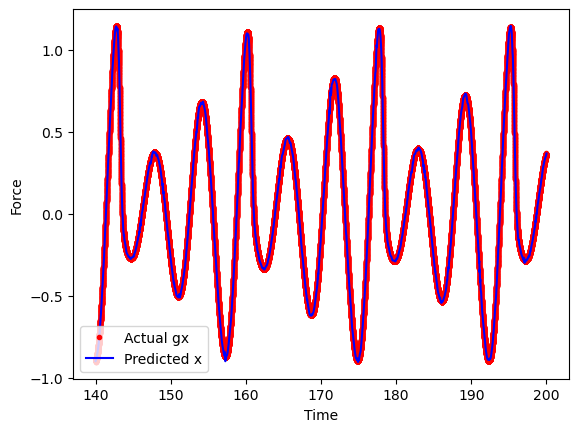

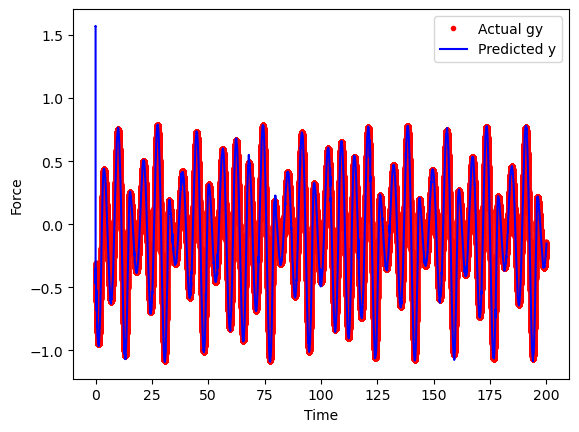

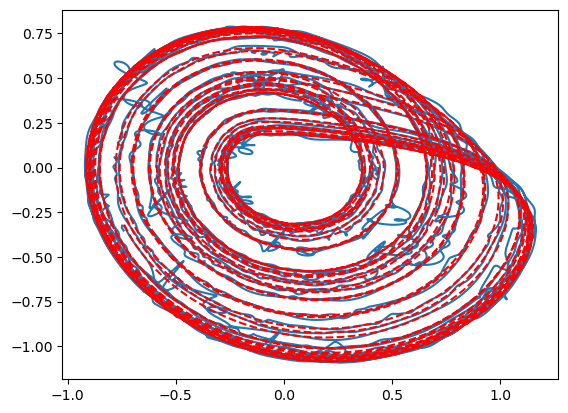

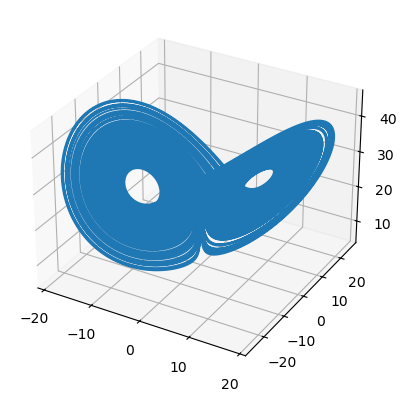

In [3]:
#np.random.seed(0)

n = 1000  # reservoir size
m = 3

mu = 1.2
lam = 0.000001

# Generate sparse reservoir matrix A1
A1 = sp.random(n, n, density=6/n, format='csr')
A1 = A1 - 0.5 * np.sign(A1.toarray())
A1 = A1 * mu / np.abs(sp.linalg.eigs(A1, k=1)[0])  # normalize reservoir matrix
A = sp.csr_matrix(A1)

Win = 0.01 * (2.0 * np.random.rand(n, m) - 1)

r = 0.5 - 1.0 * np.random.rand(n)

x, y, z = -7.45, -3.03, 0.01

T = 100
dt = 0.002

ntraining = int(T / dt)
times = dt * np.arange(1, ntraining + 1)

R = np.zeros((n, ntraining))
f = np.zeros((m, ntraining))

for t in range(ntraining):
    
    u = np.array([x, y, z])
    R[:, t] = r

    fx = np.cos(0.05 * dt * t)
    fy = np.sin(0.05 * dt * t)
    f[0, t] = fx
    f[1, t] = fy

    xp = 10 * (y - x) + fx
    yp = x * (28 - z) - y + fy
    zp = x * y - 2.66667 * z

    x += dt * xp
    y += dt * yp
    z += dt * zp

    r = np.tanh(A.dot(r) + Win.dot(u) + 1)

Wout = f.dot(R.T).dot(np.linalg.inv(R.dot(R.T) + lam * np.eye(n)))

v = np.array([x, y, z])

ndist = int(200 / dt)

xross = np.zeros(ndist + 1)
yross = np.zeros(ndist + 1)
zross = np.zeros(ndist + 1)

xross[0] = -7.45
yross[0] = -3.03
zross[0] = 0.01


gx = np.zeros(ndist)
gy = np.zeros(ndist)

gpredx = np.zeros(ndist)
gpredy = np.zeros(ndist)

xplot = np.zeros(ndist)
yplot = np.zeros(ndist)
zplot = np.zeros(ndist)



for t in range(ndist):

    xrossdot = - yross[t] - zross[t]
    yrossdot = xross[t] + 0.2 * yross[t]
    zrossdot = 0.2 + zross[t] * (xross[t] - 5.7)

    xross[t + 1] = xross[t] + dt * xrossdot
    yross[t + 1] = yross[t] + dt * yrossdot
    zross[t + 1] = zross[t] + dt * zrossdot
 
    gx[t] = xross[t] / 10
    gy[t] = yross[t] / 10

    xp = 10 * (y - x) + gx[t]
    yp = x * (28 - z) - y + gy[t]
    zp = x * y - 2.66667 * z

    x += dt * xp
    y += dt * yp
    z += dt * zp
    
    xplot[t] = x
    yplot[t] = y
    zplot[t] = z




    v = np.array([x, y, z])

    r = np.tanh(A.dot(r) + Win.dot(v) + 1)
    v = Wout.dot(r)
    gpredx[t] = v[0]
    gpredy[t] = v[1]



times = dt * np.arange(1, ndist + 1)

plt.figure()
plt.plot(times[70000:], gx[70000:], 'r.', label='Actual gx')
plt.plot(times[70000:], gpredx[70000:],'b-', label='Predicted x')
plt.xlabel('Time')
plt.ylabel('Force')
plt.legend()
plt.show()

plt.figure()
plt.plot(times, gy, 'r.', label='Actual gy')
plt.plot(times, gpredy,'b-', label='Predicted y')
plt.xlabel('Time')
plt.ylabel('Force')
plt.legend()
plt.show()

plt.figure()
plt.plot(gpredx[10:], gpredy[10:])
plt.plot(gx[10:], gy[10:], 'r--')
plt.show()

plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(xplot, yplot, zplot)
plt.show()

In [ ]:
ndist

In [ ]:
#np.random.seed(0)

n = 500  # reservoir size
m = 3

mu = 1.2
lam = 0.000001

# Generate sparse reservoir matrix A1
A1 = sp.random(n, n, density=6/n, format='csr')
A1 = A1 - 0.5 * np.sign(A1.toarray())
A1 = A1 * mu / np.abs(sp.linalg.eigs(A1, k=1)[0])  # normalize reservoir matrix
A = sp.csr_matrix(A1)

Win = 0.01 * (2.0 * np.random.rand(n, m) - 1)

r = 0.5 - 1.0 * np.random.rand(n)

x, y, z = -2.9708, -5.1844, 12.1317

T = 100
dt = 0.02

ntraining = int(T / dt)
times = dt * np.arange(1, ntraining + 1)

R = np.zeros((n, ntraining))
f = np.zeros((m, ntraining))

for t in range(ntraining):
    
    u = np.array([x, y, z])
    R[:, t] = r

    fx = np.cos(0.05 * dt * t)
    fy = np.cos(0.05 * dt * t - 0.05)
    f[0, t] = fx
    f[1, t] = fy

    xp = 10 * (y - x) + fx
    yp = x * (28 - z) - y + fy
    zp = x * y - 2.66667 * z

    x += dt * xp
    y += dt * yp
    z += dt * zp

    r = np.tanh(A.dot(r) + Win.dot(u) + 1)

Wout = f.dot(R.T).dot(np.linalg.inv(R.dot(R.T) + lam * np.eye(n)))

v = np.array([x, y, z])

ndist = int(60 / dt)

xross = np.zeros(ndist + 1)
yross = np.zeros(ndist + 1)
zross = np.zeros(ndist + 1)

gx = np.zeros(ndist)
gy = np.zeros(ndist)

gpredx = np.zeros(ndist)
gpredy = np.zeros(ndist)

for t in range(ndist):

    xrossdot = - yross[t] - zross[t]
    yrossdot = xross[t] + 0.2 * yross[t]
    zrossdot = 0.2 + zross[t] * (xross[t] - 5.7)

    xross[t + 1] = xross[t] + dt * xrossdot
    yross[t + 1] = yross[t] + dt * yrossdot
    zross[t + 1] = zross[t] + dt * zrossdot
 
    gx[t] = xross[t] / 10
    gy[t] = yross[t] / 10

    xp = 10 * (y - x) + gx[t]
    yp = x * (28 - z) - y + gy[t]
    zp = x * y - 2.66667 * z

    x += dt * xp
    y += dt * yp
    z += dt * zp
    
    v = np.array([x, y, z])

    r = np.tanh(A.dot(r) + Win.dot(v) + 1)
    v = Wout.dot(r)
    gpredx[t] = v[0]
    gpredy[t] = v[1]



times = dt * np.arange(1, ndist + 1)

plt.figure()
plt.plot(times[10:], gx[10:], 'r.', label='Actual gx')
plt.plot(times[10:], gpredx[10:],'b-', label='Predicted x')
plt.xlabel('Time')
plt.ylabel('Force')
plt.legend()
plt.show()

plt.figure()
plt.plot(times[10:], gy[10:], 'r.', label='Actual gy')
plt.plot(times[10:], gpredy[10:],'b-', label='Predicted y')
plt.xlabel('Time')
plt.ylabel('Force')
plt.legend()
plt.show()

plt.figure()
plt.plot(gpredx[10:], gpredy[10:], 'r.', label='Actual gy')


plt.legend()
plt.show()